---

# CreditCard

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn

from time import time
from tqdm import tqdm

from sklearn.metrics import roc_auc_score, average_precision_score,auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle

import pandas as pd
import os
import sys

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

os.environ['CUDA_VISIBLE_DEVICES'] = '3'

device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')

from load_data import get_CreditCard
from FGAN_MODEL import FenceGAN

In [2]:
def meanAUC_PRAUC(auc_list, pr_list, name, SPACE_AUC, SPACE_AUPRC):
    print('AUC:')
    print(auc_list)
    print('**************')
    print('PR AUC:')
    print(pr_list)
    print('**************')
    
    
    AUC_Frame = pd.DataFrame(auc_list, columns = [name])
    PR_AUC_Frame = pd.DataFrame(pr_list, columns = [name])
    
    AU_NAME = f'{name}.csv'
    
    AUC_Frame.to_csv(os.path.join(SPACE_AUC, AU_NAME), index=False)
    PR_AUC_Frame.to_csv(os.path.join(SPACE_AUPRC, AU_NAME), index=False)
    
    AUC_Frame = list(AUC_Frame[name])

    N = len(AUC_Frame)
    mean_auc = np.mean(AUC_Frame)
    std_auc = np.std(AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')
    print('**************')
    
    PR_AUC_Frame = list(PR_AUC_Frame[name])

    N = len(PR_AUC_Frame)
    mean_auc = np.mean(PR_AUC_Frame)
    std_auc = np.std(PR_AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('PR AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')

In [3]:
batch_size = 1024

WORK_SPACE = '../Dataset'

SPACE_MODELS = './models'
SPACE_AUC = './auc'
SPACE_AUPRC = './auprc'

for n in (SPACE_MODELS, SPACE_AUC, SPACE_AUPRC):
    if not os.path.exists(n):
        os.mkdir(n)
        
DATASET = 'CreditCard'
FILE = 'creditcard.csv'

PATH = os.path.join(WORK_SPACE, DATASET, FILE)

In [4]:
dataset = get_CreditCard(PATH, seed, show=True)

284315 normal records, 492 anormal records
-----------------------------------------------------------------------------------------
There are 227846 records in training set
Training set is composed by 227846 normal records and 0 abnormal records
-----------------------------------------------------------------------------------------
There are 14240 records in validation set
Validation set is composed by 14117 normal records and 123 abnormal records
-----------------------------------------------------------------------------------------
There are 42721 records in test set
Test set is composed by 42352 normal records and 369 abnormal records


In [5]:
nc = dataset['x_train'].shape[1]
z_dim = 32
gamma = 0.1
alpha = 0.5 
beta = 30 
_power = 2
v_freq = 4

g_objective_anneal = 1
repeat = 4 
baseline = 0.5

#### Mean AUC and standard deviation after seven runs

Iteration: 1
Epoch #1: Loss: 0.7260
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.080 | g_loss: 3.4114
[INFO] Training phase... Elapsed time: 369 seconds



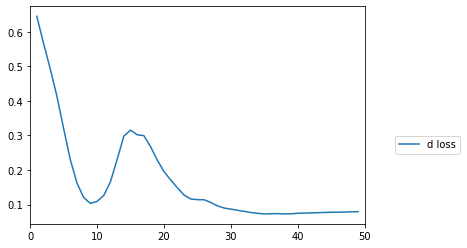

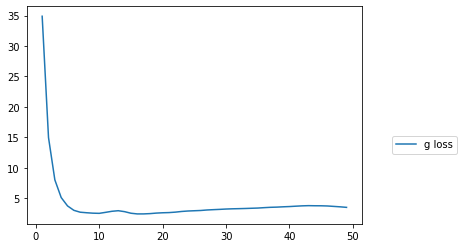

PR AUC: 0.50


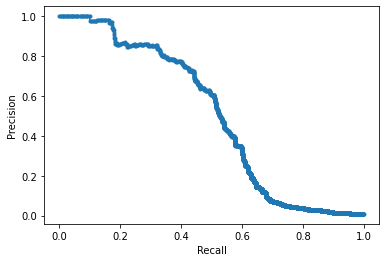

AUC: 0.88
Iteration: 2
Epoch #1: Loss: 0.6957
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.081 | g_loss: 3.3913
[INFO] Training phase... Elapsed time: 391 seconds



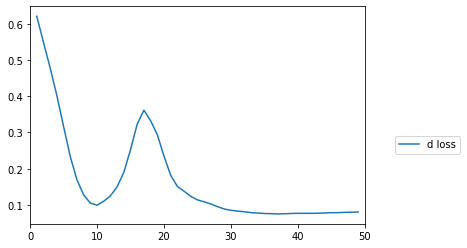

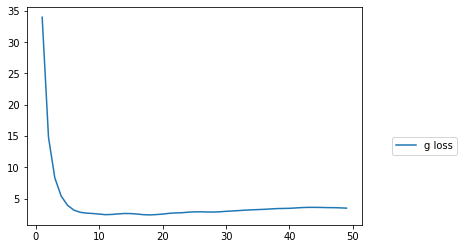

PR AUC: 0.33


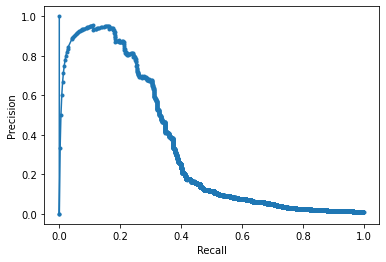

AUC: 0.86
Iteration: 3
Epoch #1: Loss: 0.7061
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.077 | g_loss: 3.4470
[INFO] Training phase... Elapsed time: 388 seconds



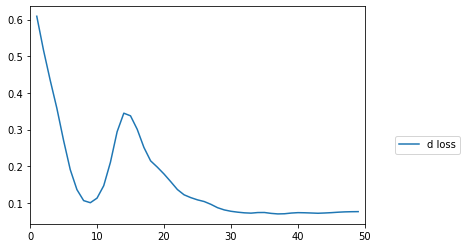

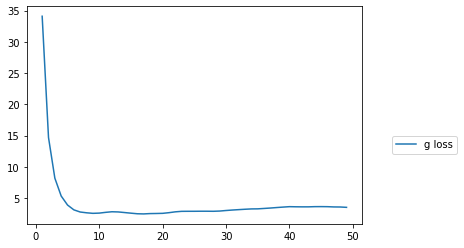

PR AUC: 0.46


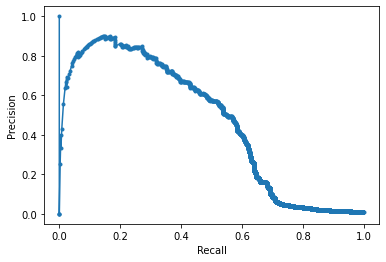

AUC: 0.88
Iteration: 4
Epoch #1: Loss: 0.7050
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.079 | g_loss: 3.3237
[INFO] Training phase... Elapsed time: 388 seconds



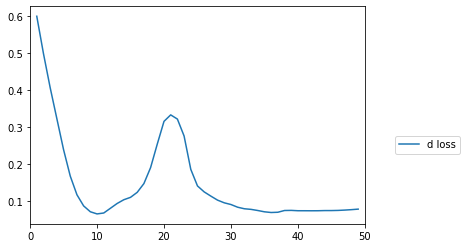

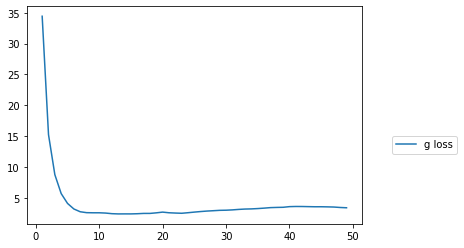

PR AUC: 0.56


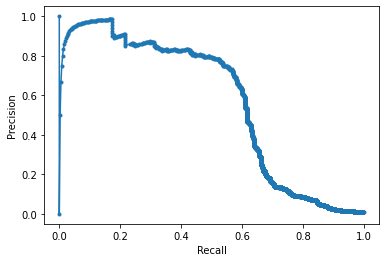

AUC: 0.92
Iteration: 5
Epoch #1: Loss: 0.7288
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.086 | g_loss: 3.3152
[INFO] Training phase... Elapsed time: 394 seconds



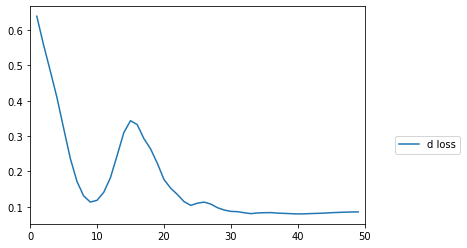

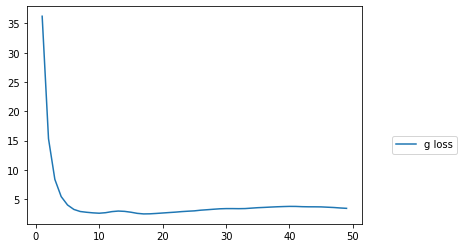

PR AUC: 0.55


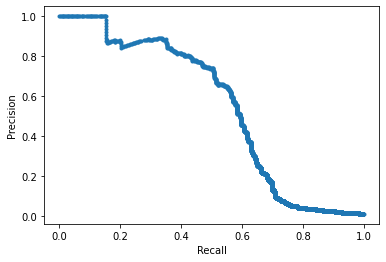

AUC: 0.90
Iteration: 6
Epoch #1: Loss: 0.7343
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.085 | g_loss: 3.2618
[INFO] Training phase... Elapsed time: 387 seconds



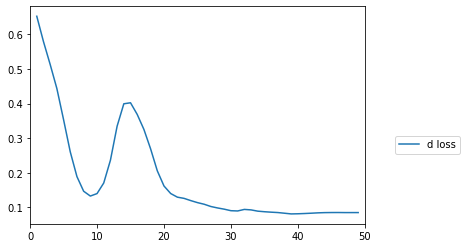

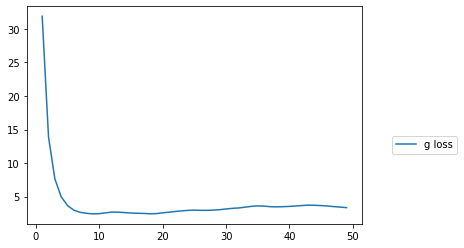

PR AUC: 0.47


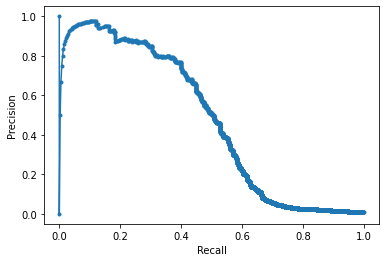

AUC: 0.87
Iteration: 7
Epoch #1: Loss: 0.7488
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.083 | g_loss: 3.2877
[INFO] Training phase... Elapsed time: 388 seconds



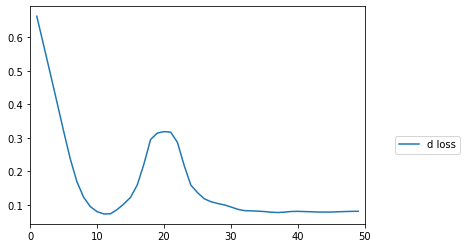

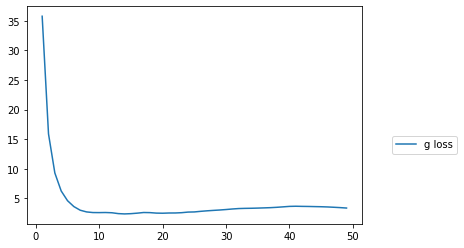

PR AUC: 0.55


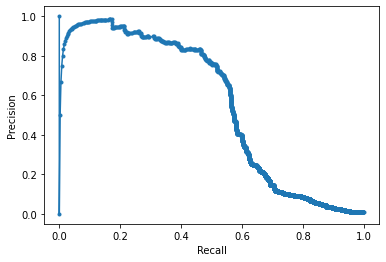

AUC: 0.92
Iteration: 8
Epoch #1: Loss: 0.6815
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.079 | g_loss: 3.3401
[INFO] Training phase... Elapsed time: 395 seconds



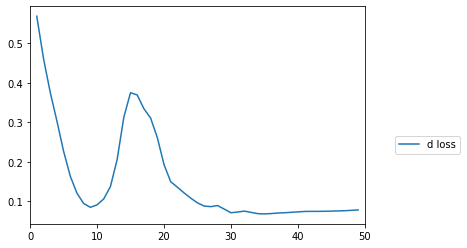

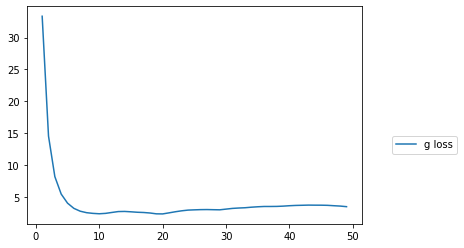

PR AUC: 0.51


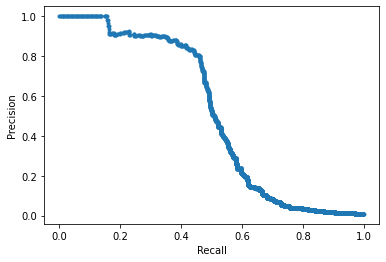

AUC: 0.88
Iteration: 9
Epoch #1: Loss: 0.7512
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.084 | g_loss: 3.3228
[INFO] Training phase... Elapsed time: 385 seconds



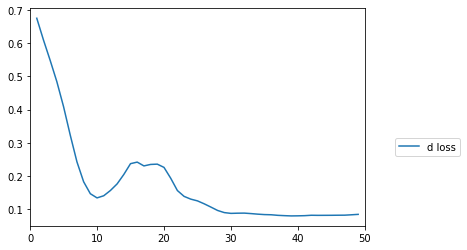

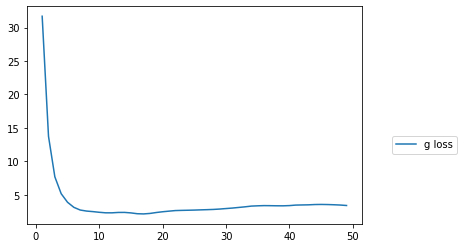

PR AUC: 0.57


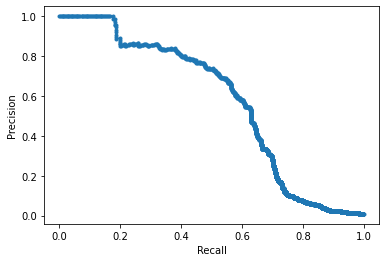

AUC: 0.92
Iteration: 10
Epoch #1: Loss: 0.6867
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.083 | g_loss: 3.3376
[INFO] Training phase... Elapsed time: 383 seconds



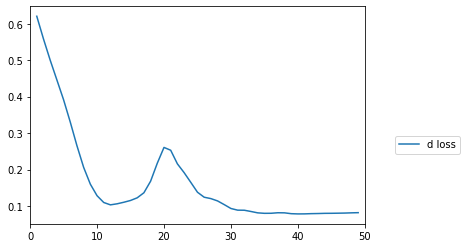

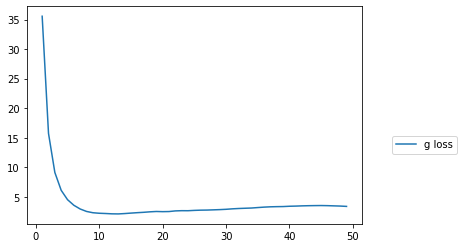

PR AUC: 0.49


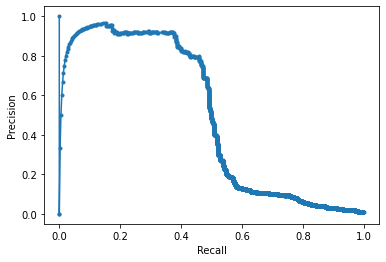

AUC: 0.92
Iteration: 11
Epoch #1: Loss: 0.7428
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.083 | g_loss: 3.3372
[INFO] Training phase... Elapsed time: 384 seconds



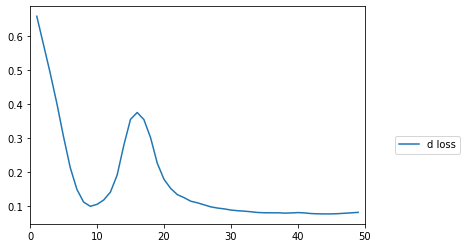

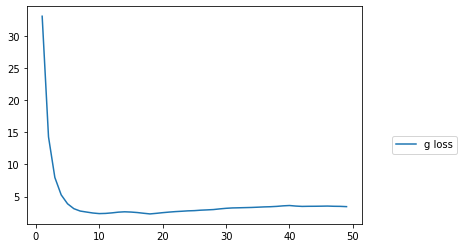

PR AUC: 0.51


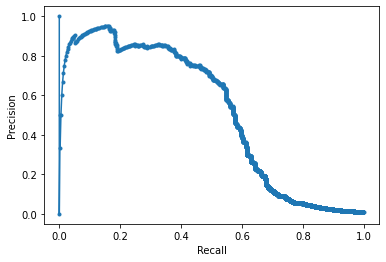

AUC: 0.91
Iteration: 12
Epoch #1: Loss: 0.6845
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.083 | g_loss: 3.3982
[INFO] Training phase... Elapsed time: 384 seconds



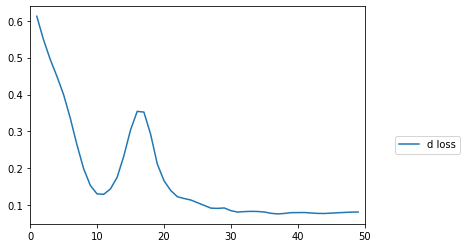

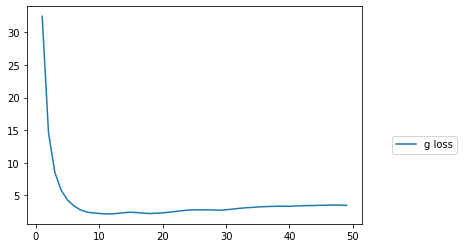

PR AUC: 0.42


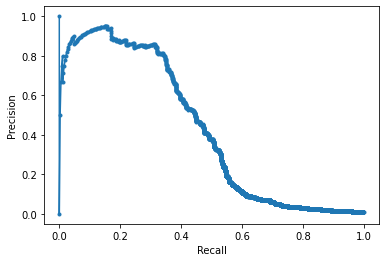

AUC: 0.88
Iteration: 13
Epoch #1: Loss: 0.7096
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.088 | g_loss: 3.3984
[INFO] Training phase... Elapsed time: 384 seconds



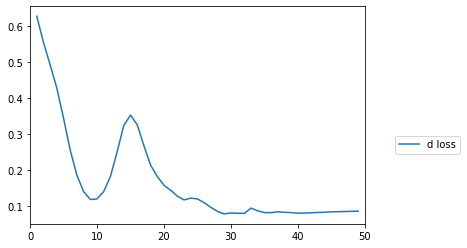

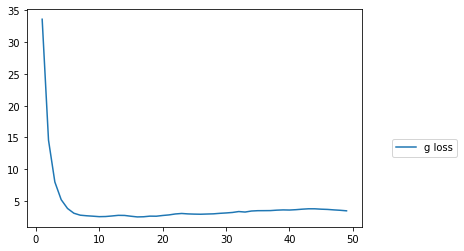

PR AUC: 0.55


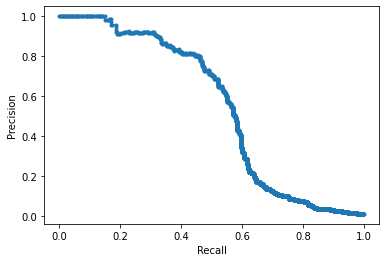

AUC: 0.92
Iteration: 14
Epoch #1: Loss: 0.7096
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.082 | g_loss: 3.3238
[INFO] Training phase... Elapsed time: 389 seconds



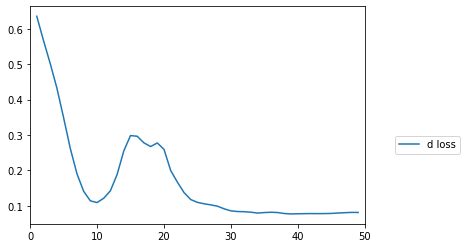

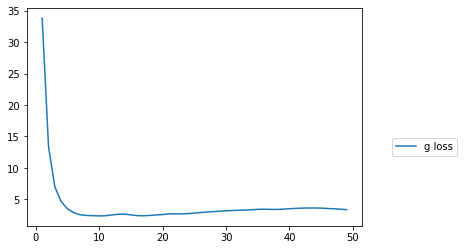

PR AUC: 0.53


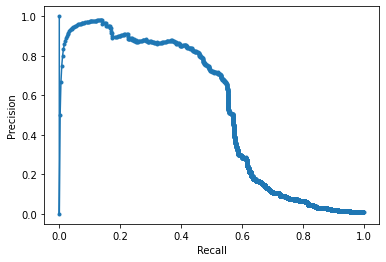

AUC: 0.90
Iteration: 15
Epoch #1: Loss: 0.7081
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.082 | g_loss: 3.4446
[INFO] Training phase... Elapsed time: 395 seconds



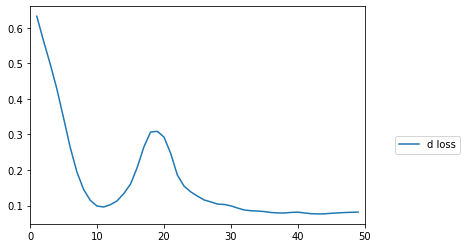

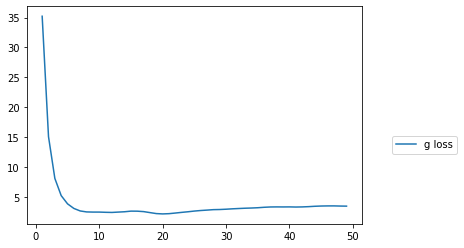

PR AUC: 0.56


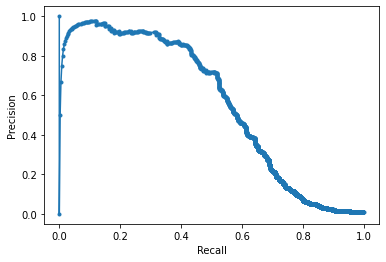

AUC: 0.91
Iteration: 16
Epoch #1: Loss: 0.7285
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.080 | g_loss: 3.3286
[INFO] Training phase... Elapsed time: 396 seconds



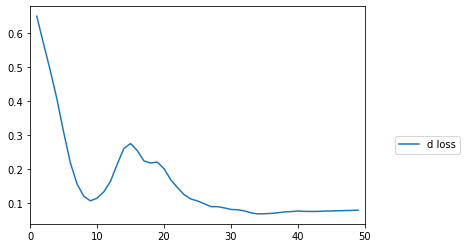

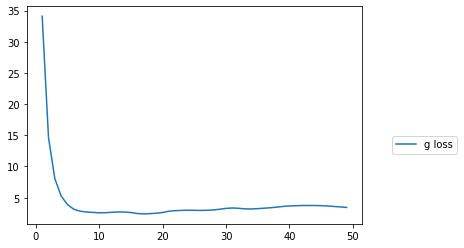

PR AUC: 0.58


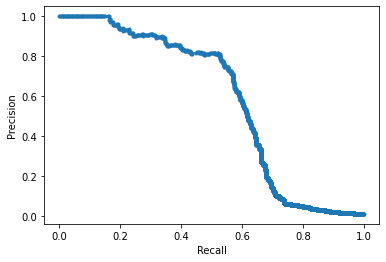

AUC: 0.90
Iteration: 17
Epoch #1: Loss: 0.7035
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.084 | g_loss: 3.3985
[INFO] Training phase... Elapsed time: 398 seconds



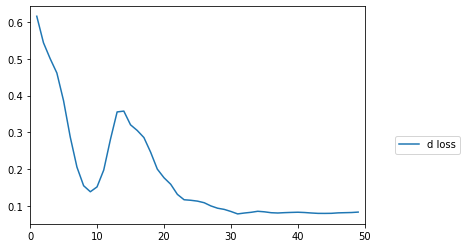

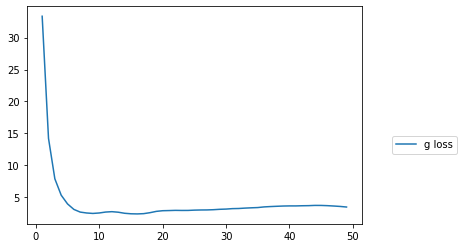

PR AUC: 0.49


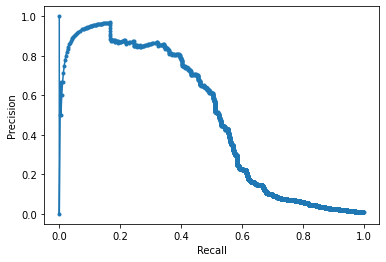

AUC: 0.91
Iteration: 18
Epoch #1: Loss: 0.7417
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.082 | g_loss: 3.2907
[INFO] Training phase... Elapsed time: 396 seconds



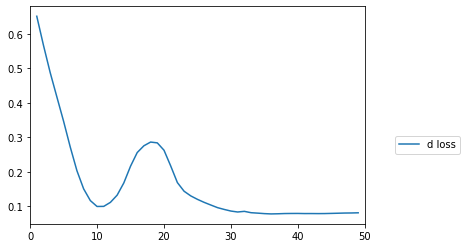

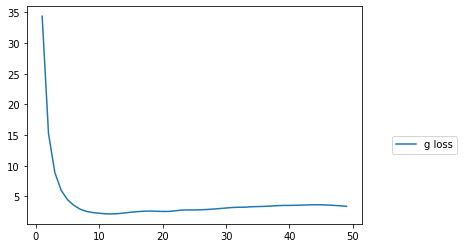

PR AUC: 0.63


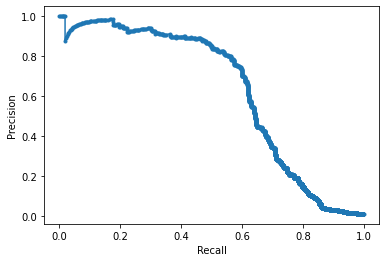

AUC: 0.93
Iteration: 19
Epoch #1: Loss: 0.7365
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.084 | g_loss: 3.2759
[INFO] Training phase... Elapsed time: 396 seconds



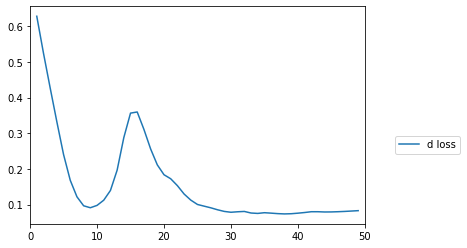

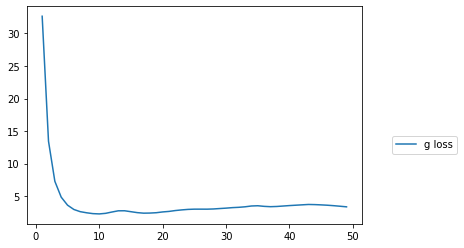

PR AUC: 0.39


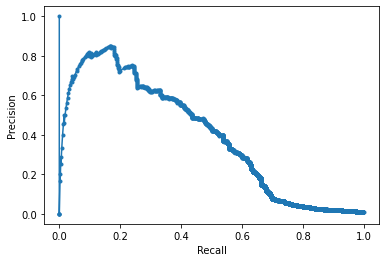

AUC: 0.90
Iteration: 20
Epoch #1: Loss: 0.6860
[INFO] Starting training phase...
Epoch [ 50/50] | d_loss: 0.079 | g_loss: 3.5119
[INFO] Training phase... Elapsed time: 399 seconds



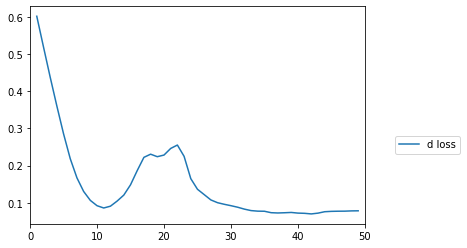

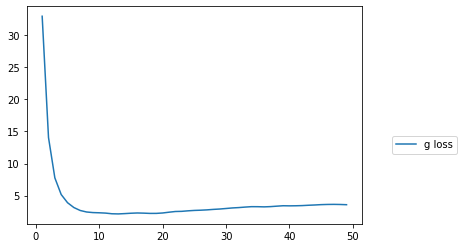

PR AUC: 0.51


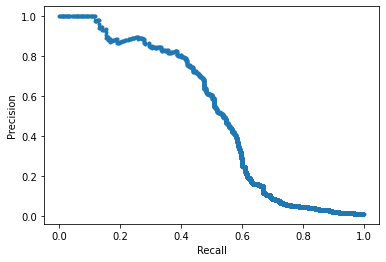

AUC: 0.89


In [6]:
n_runs = 20
auc_list = []
n_epochs = 50
seed = 42
pr_list = []

for i in range(n_runs):
    print(f'Iteration: {i+1}')
    dataset = get_CreditCard(PATH, seed*(i+1), show=False)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_train']).to(device), 
                                              torch.tensor(dataset['y_train'].to_numpy()).to(device))
    
    train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_val']).to(device), 
                                              torch.tensor(dataset['y_val'].to_numpy()).to(device))
    val_loader = DataLoader(dataset=val_dataset, batch_size = batch_size, shuffle=False)

    test_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_test']).to(device), 
                                              torch.tensor(dataset['y_test'].to_numpy()).to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)
    
    trainer = FenceGAN(nc, z_dim, gamma, alpha, beta, _power, v_freq, g_objective_anneal, repeat, baseline, device)
    
    d_losses, g_losses = trainer.train(train_loader, test_loader, val_loader, batch_size, n_epochs)
    
    # Save models
    NAME_D = f'D_FGAN_{DATASET}_{i}.ckpt'
    NAME_G = f'G_FGAN_{DATASET}_{i}.ckpt'
    
    torch.save(trainer.D.state_dict(), os.path.join(SPACE_MODELS, NAME_D))
    torch.save(trainer.G.state_dict(), os.path.join(SPACE_MODELS, NAME_G))
    
    _auc, pr_auc = trainer.predict(test_loader)
    print(f'AUC: {_auc:.2f}')
    auc_list.append(_auc)
    pr_list.append(pr_auc)

In [7]:
meanAUC_PRAUC(auc_list, pr_list, 'FGAN_LR_CreditCard', SPACE_AUC, SPACE_AUPRC)

AUC:
[0.8787794294404976, 0.860745258732338, 0.8829264389404378, 0.918489369772806, 0.9027877599327561, 0.8732689279575078, 0.9188936470494287, 0.8812756720549827, 0.9183188732860128, 0.9204826653479985, 0.907206527203164, 0.8751979474129838, 0.9167415968171772, 0.9025113310256638, 0.908282296366598, 0.8991978634605009, 0.9123297402694465, 0.9274183434127503, 0.8994814270488757, 0.8946042485075398]
**************
PR AUC:
[0.5000325481991037, 0.334790929555941, 0.4604956375485668, 0.5635353964948779, 0.5457399815396031, 0.46921356146041493, 0.5502858119271714, 0.5118634931154779, 0.5728620589476654, 0.4860794012336763, 0.5116286205466919, 0.4223947422716416, 0.546476527305327, 0.5284166740358924, 0.5558097070421972, 0.5795156704213446, 0.4852085369766373, 0.6280169990068987, 0.38852355556933044, 0.5066982585856644]
**************
AUC
0.90 +/- 0.01
95% confidence level, average auc would be between 0.89 and 0.91
**************
PR AUC
0.51 +/- 0.03
95% confidence level, average auc would 

---